<a href="https://colab.research.google.com/github/cuboidalstudios/MLAssignment2025/blob/main/MLTask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CM2604 Assignment - Telco Customer Churn**
# Machine Learning Coursework - Task 1
Perform an Exploratory Data Analysis on the dataset and visualize. Document the insights extracted from
the analysis in the report

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

## Load Dataset

In [ ]:
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/Telco-Customer-Churn.csv")
df.head()

Mounted at /content/drive


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Cleaning & Feature Engineering

In [ ]:
# Find Missing Values
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

df = df.drop_duplicates()

Number of duplicate rows: 0


here we can see there are no duplicate or nan values

In [ ]:
# Clean TotalCharges
# Convert TotalCharges to numeric, coerce errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Remove rows with missing TotalCharges
df = df.dropna(subset=['TotalCharges'])
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Encode churn labels (Yes = 1, No = 0)
df['Churn_encoded'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Create average monthly spend
df['AvgMonthlySpend'] = df['TotalCharges'] / df['tenure']

# Create tenure categories (binning)
df['TenureCategory'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 24, 48, 100],
    labels=['0-1yr', '1-2yr', '2-4yr', '4+yr']
)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_encoded,AvgMonthlySpend,TenureCategory
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,29.850000,0-1yr
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,0,55.573529,2-4yr
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,54.075000,0-1yr
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,40.905556,2-4yr
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,75.825000,0-1yr


* changed totalcharges to a numeric value
* created the feature Churn_encoded to easier perform EDA
* created the feature AvgMonthlySpend to enable us to fairly compare records despite Contracts
* used binning to create the feature TenureCategories for representation of tenure in a graphical format





# Exploratory Data Analysis

### Five Number Summary

In [ ]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgMonthlySpend']
df[num_cols].describe().loc[['min', '25%', '50%', '75%', 'max']]

,tenure,MonthlyCharges,TotalCharges,AvgMonthlySpend
min,1.0,18.2500,18.8000,13.775000
25%,9.0,35.5875,401.4500,36.179891
50%,29.0,70.3500,1397.4750,70.373239
75%,55.0,89.8625,3794.7375,90.179560
max,72.0,118.7500,8684.8000,121.400000


### Churn distribution

In [ ]:
df['Churn'].value_counts()

,count
Churn,
No,5163
Yes,1869


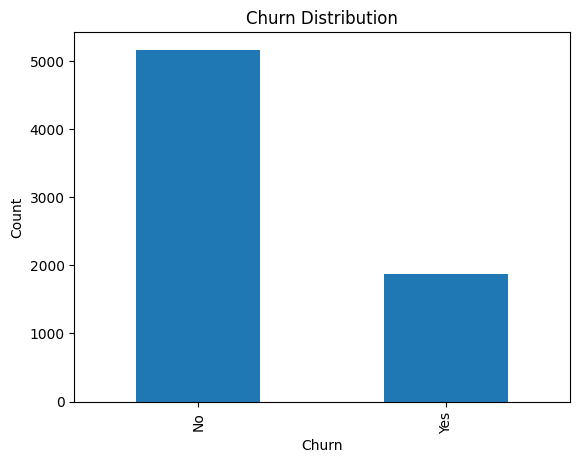

In [ ]:
df['Churn'].value_counts().plot(kind='bar')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
# plt.grid(True)
plt.show()

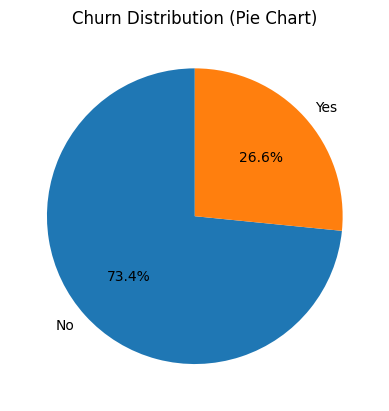

In [ ]:
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution (Pie Chart)')
plt.ylabel('')
plt.show()

Most customers did not churn (73%), while some customers (27%) did.

### tenure distribution

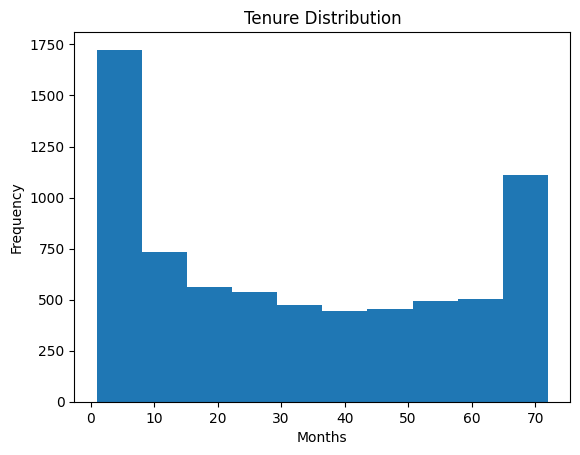

In [ ]:
# Plot tenure distribution
df['tenure'].plot(kind='hist')
plt.title('Tenure Distribution')
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.show()

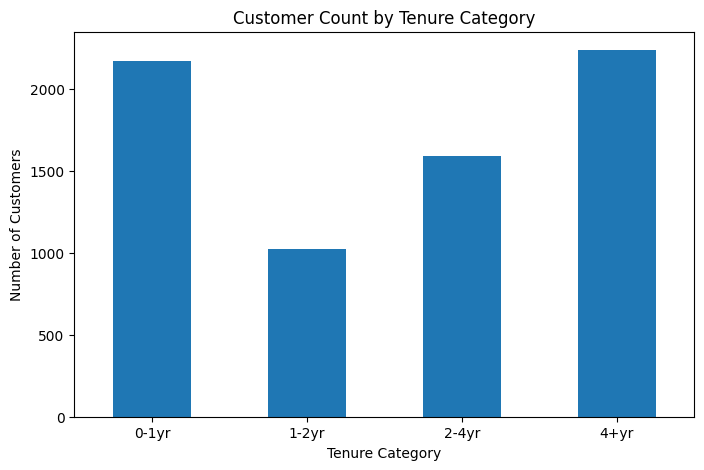

In [ ]:
# Count of customers per tenure category
tenure_counts = df['TenureCategory'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8,5))
tenure_counts.plot(kind='bar')

plt.title('Customer Count by Tenure Category')
plt.xlabel('Tenure Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

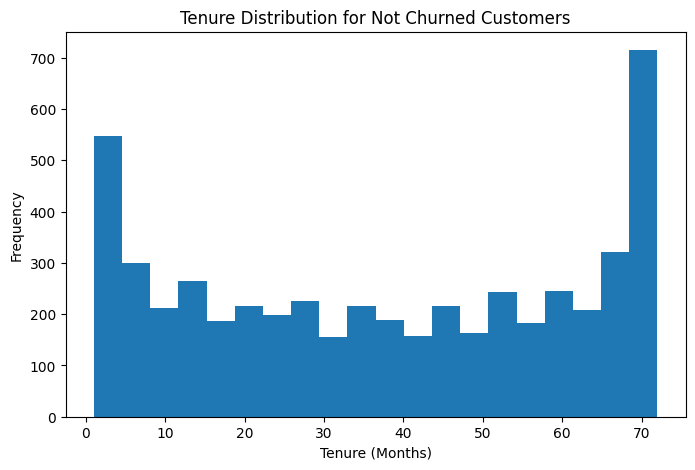

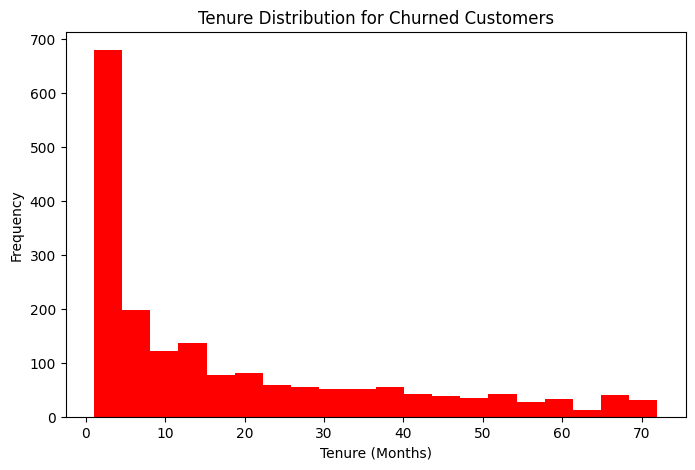

In [ ]:
plt.figure(figsize=(8,5))

df[df['Churn']=='No']['tenure'].plot(kind='hist', bins=20)
plt.title('Tenure Distribution for Not Churned Customers')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8,5))

df[df['Churn']=='Yes']['tenure'].plot(kind='hist',color = 'red', bins=20)
plt.title('Tenure Distribution for Churned Customers')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.show()

The majority of customers tenure was for around 1 month. however factoring out churned customers we can see that non churn customers follow an inverse normal distribution. which can suggest that customers stayed with the service for extensive periods of time or would try it for a small period of time and churn

### Numerical Feature Correlation Analysis

In [ ]:
# Correlation matrix
df_corr = df.corr(numeric_only=True)
df_corr

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_encoded,AvgMonthlySpend
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,0.150541,0.217616
tenure,0.015683,1.000000,0.246862,0.825880,-0.354049,0.246198
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.192858,0.996237
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484,0.650915
Churn_encoded,0.150541,-0.354049,0.192858,-0.199484,1.000000,0.192033
AvgMonthlySpend,0.217616,0.246198,0.996237,0.650915,0.192033,1.000000


<Axes: >

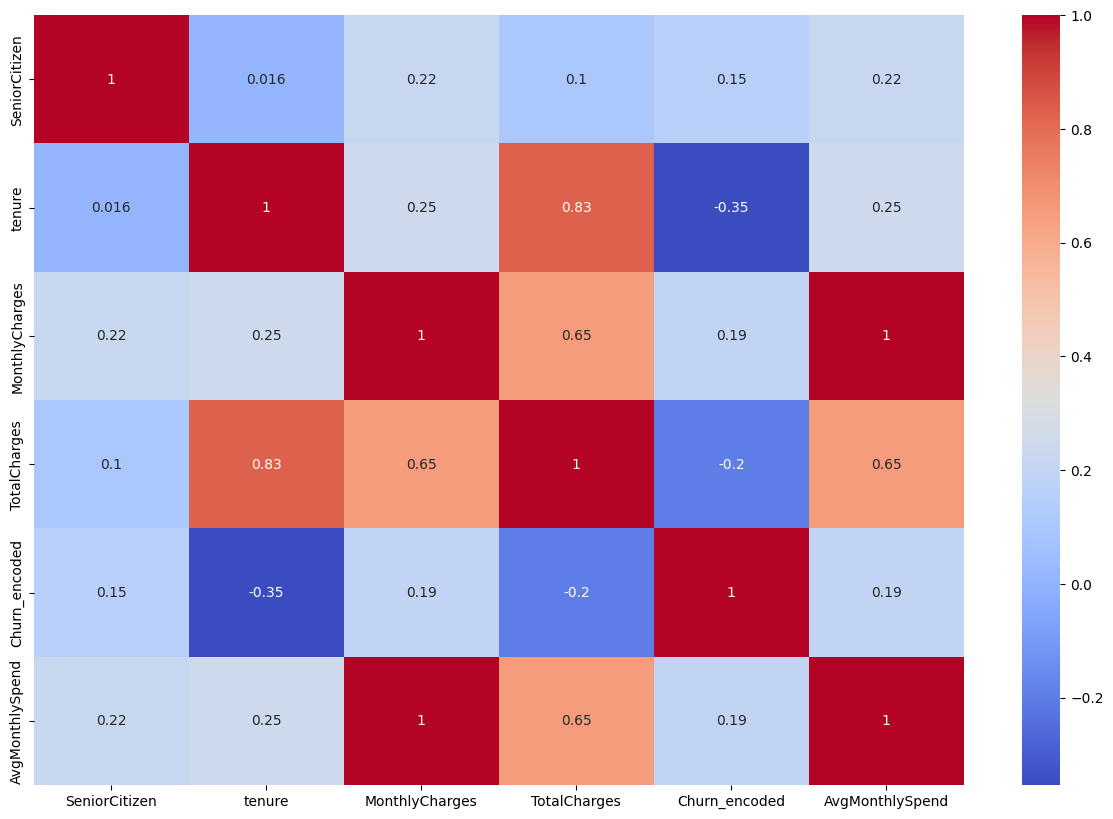

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')

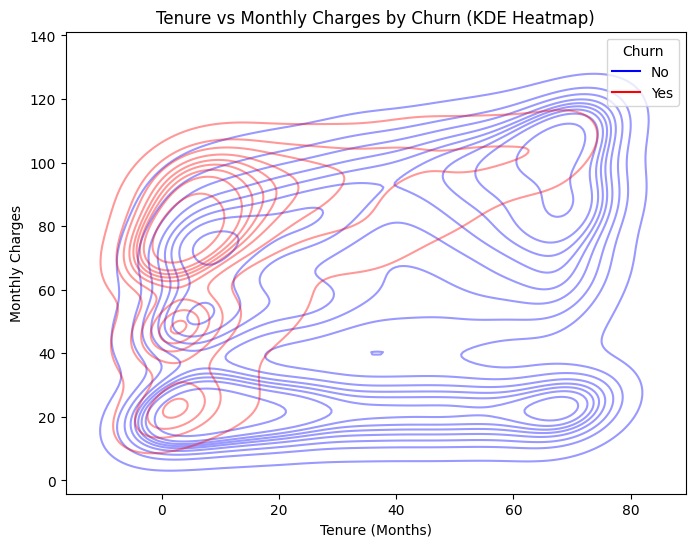

In [ ]:
plt.figure(figsize=(8,6))

sns.kdeplot(
    data=df,
    x='tenure',
    y='MonthlyCharges',
    hue='Churn',
    fill=False,
    alpha=0.4,
    palette=['blue','red']
)

plt.title('Tenure vs Monthly Charges by Churn (KDE Heatmap)')
plt.xlabel('Tenure (Months)')
plt.ylabel('Monthly Charges')
plt.show()

Here we can see that Tenure has a strong correlation with monthly charges (along with total charges from which monthly charges is derieved.) tenure subsequently is related to churn as non churn customers tended to have longer tenures.

Using the above heatmap we can see that high monthly charges lead to low tenure and a higher density of churned customers

### correlation analysis of categorical features by churn

Cramers V is used here to compare the correlation of categorical features generating a number between 0-1

the following interpretation table was used:

| Cramér’s V | Strength of Association |
|------------|-----------------------|
| 0.00 – 0.10 | Negligible |
| 0.11 – 0.20 | Weak |
| 0.21 – 0.34 | Moderate |
| 0.35 – 0.50 | Strong |
| > 0.50      | Very Strong |

values presented later are rounded up to 2 significant figures

In [ ]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))


In [ ]:
categorical_cols = df.select_dtypes(include='object').columns.drop('customerID')  # all categorical except ID

cat_corr = {}
for col in categorical_cols:
    cat_corr[col] = cramers_v(df[col], df['Churn_encoded'])

# Convert to a sorted series
cat_corr = pd.Series(cat_corr).sort_values(ascending=False)
cat_corr

,0
Churn,0.999636
Contract,0.409560
OnlineSecurity,0.346992
TechSupport,0.342506
InternetService,0.321909
PaymentMethod,0.302960
OnlineBackup,0.291902
DeviceProtection,0.281159
StreamingMovies,0.230702
StreamingTV,0.230143


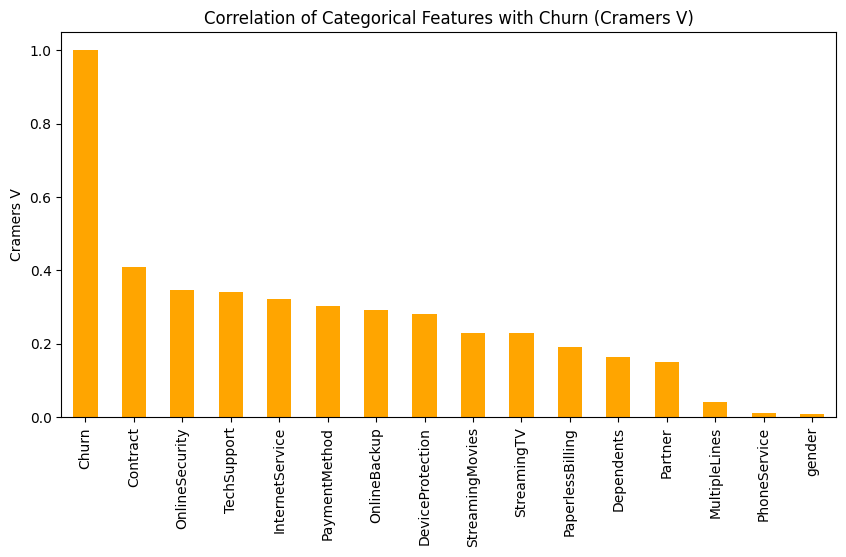

In [ ]:
plt.figure(figsize=(10,5))
cat_corr.plot(kind='bar', color='orange')
plt.title("Correlation of Categorical Features with Churn (Cramers V)")
plt.ylabel("Cramers V")
plt.show()

Through Cramer's V analysis we can see that contract type as well as whether or not the customer opted for online security have a strong correlation to customer churn

### Monthly Charges by Churn

<Figure size 800x500 with 0 Axes>

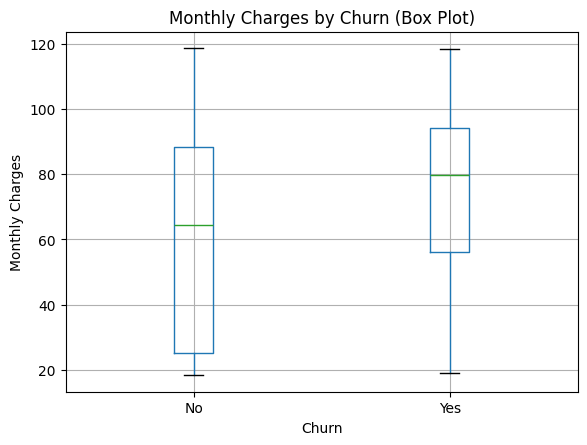

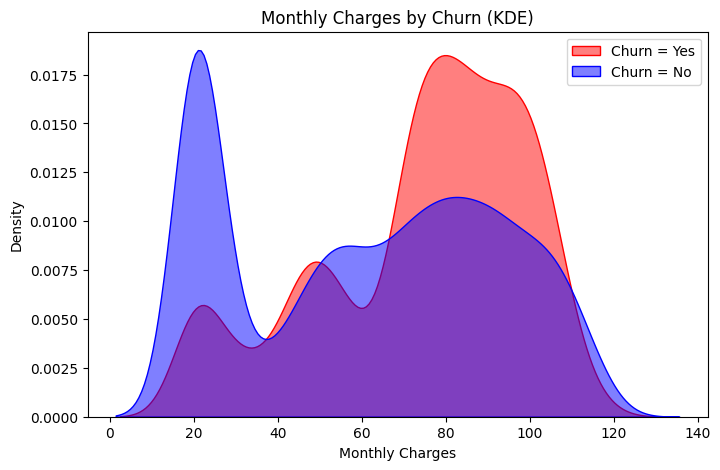

In [ ]:
# Box Plot
plt.figure(figsize=(8,5))

df.boxplot(column='MonthlyCharges', by='Churn')
plt.title("Monthly Charges by Churn (Box Plot)")
plt.suptitle('')
plt.ylabel("Monthly Charges")
plt.show()

# KDE plot (filled) per churn group
plt.figure(figsize=(8,5))

sns.kdeplot(
    data=df[df['Churn']=='Yes'], x='MonthlyCharges', fill=True, color='red', alpha=0.5, label='Churn = Yes'
)
sns.kdeplot(
    data=df[df['Churn']=='No'], x='MonthlyCharges', fill=True, color='blue', alpha=0.5, label='Churn = No'
)

plt.title('Monthly Charges by Churn (KDE)')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend()
plt.show()

here we can see that customers with lower fees around the 20 monthly charges range did not churn while we can see a drastic increase in customer churn as the price increased.

### Tenure by Churn

<Figure size 800x500 with 0 Axes>

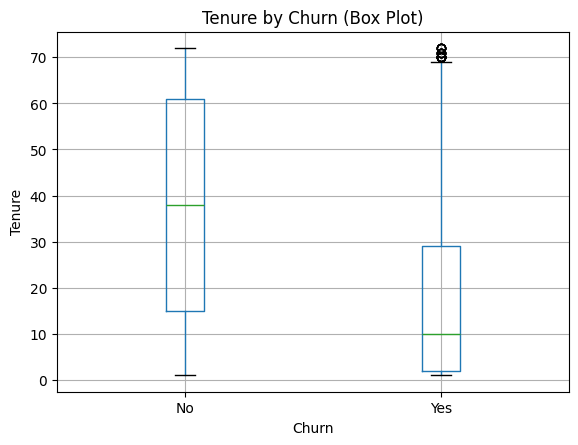

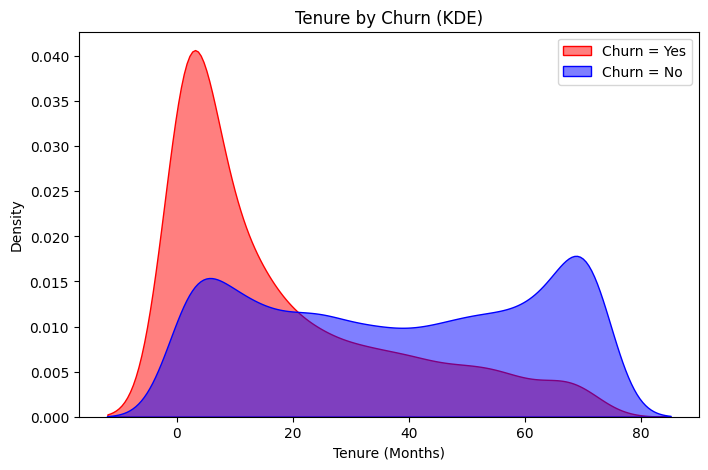

In [ ]:
# Box Plot
plt.figure(figsize=(8,5))

df.boxplot(column='tenure', by='Churn')
plt.title("Tenure by Churn (Box Plot)")
plt.suptitle('')
plt.ylabel("Tenure")
plt.show()


# KDE plot
plt.figure(figsize=(8,5))

sns.kdeplot(
    data=df[df['Churn']=='Yes'], x='tenure', fill=True, color='red', alpha=0.5, label='Churn = Yes'
)
sns.kdeplot(
    data=df[df['Churn']=='No'], x='tenure', fill=True, color='blue', alpha=0.5, label='Churn = No'
)

plt.title('Tenure by Churn (KDE)')
plt.xlabel('Tenure (Months)')
plt.ylabel('Density')
plt.legend()
plt.show()

the density of most churn customers is within the 1 - 10 month range. while non churn customers comparitively have an even distribution. however by themselves they have a inverse normal distribution.

### Contract Type by Churn

<Figure size 800x500 with 0 Axes>

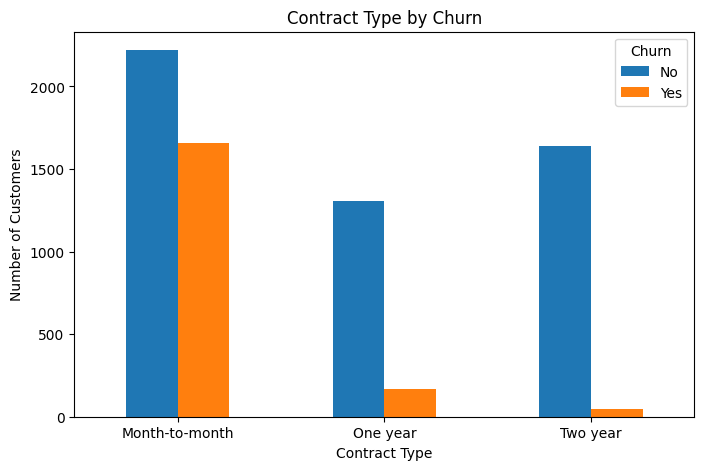

In [ ]:
plt.figure(figsize=(8,5))

# Count of churn per contract type
contract_churn = df.groupby(['Contract', 'Churn']).size().unstack()

# Double bar chart
contract_churn.plot(kind='bar', figsize=(8,5))

plt.title('Contract Type by Churn')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.show()

here we can see there is a steep correlation between the duration of a contract as well as the churn of a customer. with non churn customers having opted for longer term contracts and vice versa

### Online Security by Churn

<Figure size 800x500 with 0 Axes>

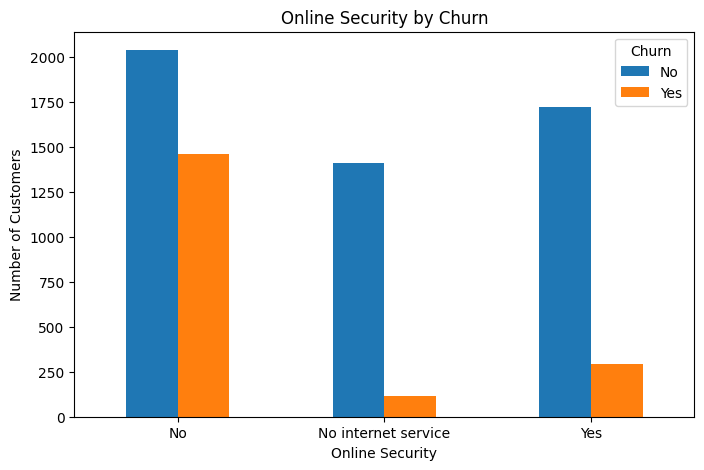

In [ ]:
plt.figure(figsize=(8,5))

# Count of churn per online security
online_security_churn = df.groupby(['OnlineSecurity', 'Churn']).size().unstack()

# Double bar chart
online_security_churn.plot(kind='bar', figsize=(8,5))

plt.title('Online Security by Churn')
plt.xlabel('Online Security')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.show()

here we can see a correlation between online security and churn. where customers who have no online security tend to churn.

### Tech Support by Churn

<Figure size 800x500 with 0 Axes>

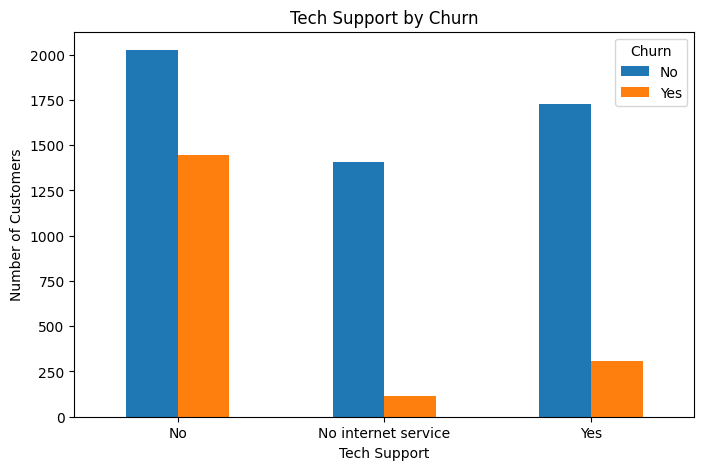

In [ ]:
plt.figure(figsize=(8,5))

# Count of churn per tech support
tech_support_churn = df.groupby(['TechSupport', 'Churn']).size().unstack()

# Double bar chart
tech_support_churn.plot(kind='bar', figsize=(8,5))

plt.title('Tech Support by Churn')
plt.xlabel('Tech Support')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.show()

here we can see a correlation between Tech Support and churn. where customers who have no tech support tend to churn.

### Exploratory Analysis of Customer churn over Monthly Cost with and without services

we have seen a correlation between lower prices and non churn customers however we have also seen a relationship between non churn customers and customers who opt for added services. However, presumably more services incure higher cost.

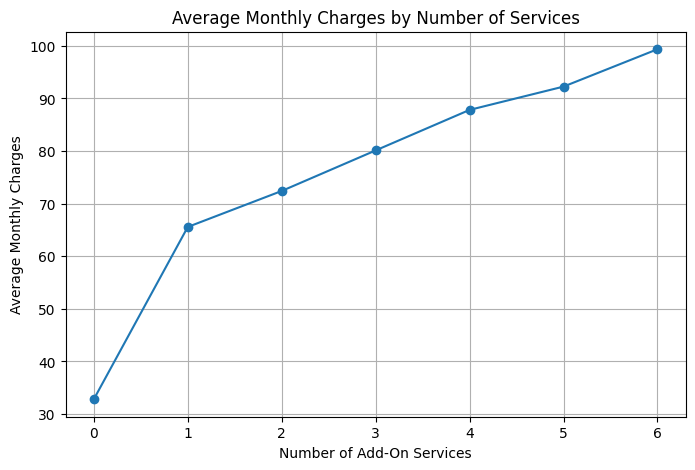

In [ ]:
# Count of services each customer has
services = ['OnlineSecurity', 'TechSupport', 'OnlineBackup',
            'DeviceProtection', 'StreamingTV', 'StreamingMovies']
df['NumServices'] = df[services].apply(lambda x: (x == 'Yes').sum(), axis=1)

# Group by number of services and calculate average monthly charge
avg_charges = df.groupby('NumServices')['MonthlyCharges'].mean()

# Line plot
plt.figure(figsize=(8,5))
avg_charges.plot(kind='line', marker='o')
plt.title('Average Monthly Charges by Number of Services')
plt.xlabel('Number of Add-On Services')
plt.ylabel('Average Monthly Charges')
plt.xticks(range(0, len(services)+1))
plt.grid(True)
plt.show()

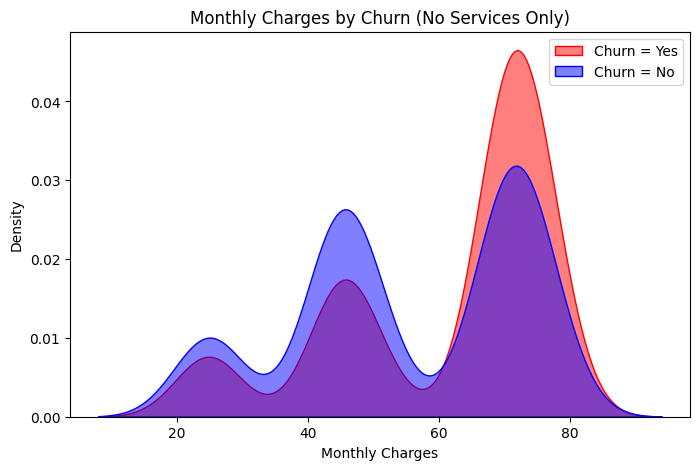

In [ ]:
# Filter dataset: only customers with 'No' for add-on services
services = ['OnlineSecurity', 'TechSupport', 'OnlineBackup',
            'DeviceProtection', 'StreamingTV', 'StreamingMovies']

df_base = df.copy()
for service in services:
    df_base = df_base[df_base[service] == 'No']

# KDE plot for MonthlyCharges by Churn
plt.figure(figsize=(8,5))

sns.kdeplot(
    data=df_base[df_base['Churn']=='Yes'],
    x='MonthlyCharges',
    fill=True,
    color='red',
    alpha=0.5,
    label='Churn = Yes'
)
sns.kdeplot(
    data=df_base[df_base['Churn']=='No'],
    x='MonthlyCharges',
    fill=True,
    color='blue',
    alpha=0.5,
    label='Churn = No'
)

plt.title('Monthly Charges by Churn (No Services Only)')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend()
plt.show()

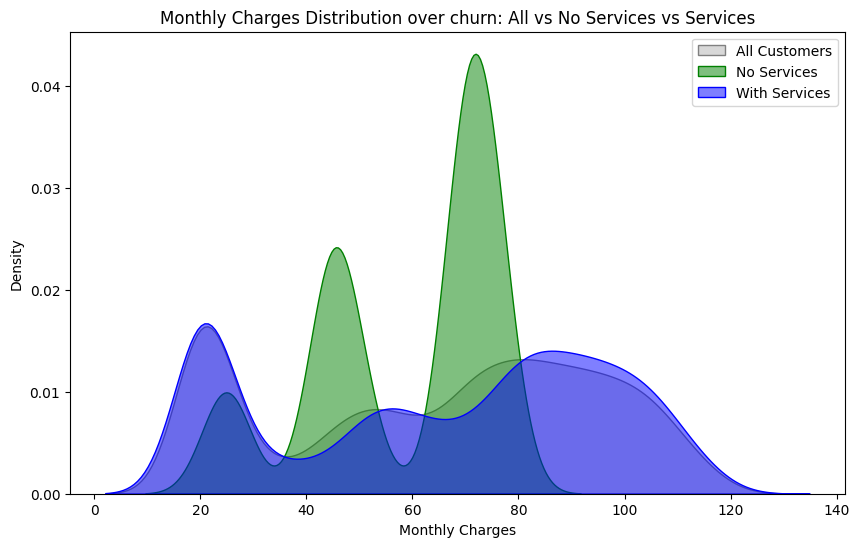

In [ ]:
# List of add-on services
services = ['OnlineSecurity', 'TechSupport', 'OnlineBackup',
            'DeviceProtection', 'StreamingTV', 'StreamingMovies']

# Customers with no add-on services (all 'No')
df_no_services = df[(df[services] == 'No').all(axis=1)]

# Customers with any add-on services (at least one 'Yes')
df_with_services = df[~((df[services] == 'No').all(axis=1))]

# Plot KDE comparison
plt.figure(figsize=(10,6))

# All customers
sns.kdeplot(
    data=df,
    x='MonthlyCharges',
    fill=True,
    color='gray',
    alpha=0.3,
    label='All Customers'
)

# No-services customers
sns.kdeplot(
    data=df_no_services,
    x='MonthlyCharges',
    fill=True,
    color='green',
    alpha=0.5,
    label='No Services'
)

# Customers with services
sns.kdeplot(
    data=df_with_services,
    x='MonthlyCharges',
    fill=True,
    color='blue',
    alpha=0.5,
    label='With Services'
)

plt.title('Monthly Charges Distribution over churn: All vs No Services vs Services')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend()
plt.show()


/tmp/ipython-input-3847727413.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(


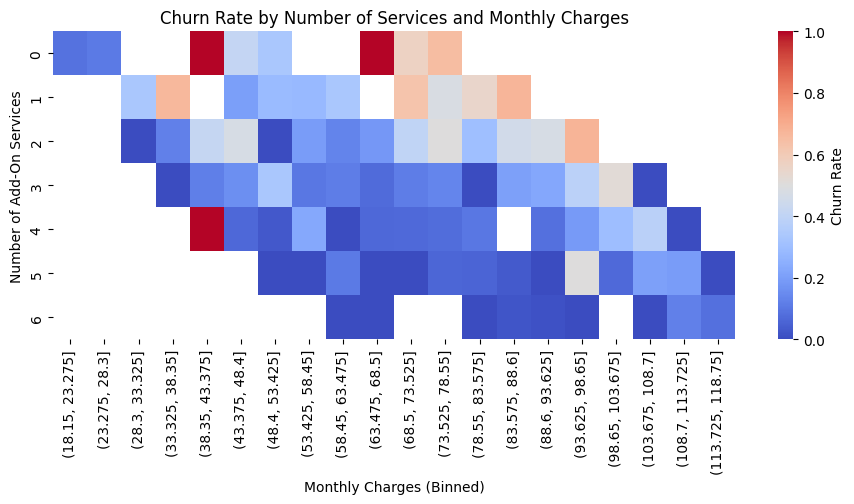

In [ ]:
# List of add-on services
services = ['OnlineSecurity', 'TechSupport', 'OnlineBackup',
            'DeviceProtection', 'StreamingTV', 'StreamingMovies']

# Count of services each customer has
df['NumServices'] = df[services].apply(lambda x: (x == 'Yes').sum(), axis=1)

# Create pivot table: NumServices vs MonthlyCharges (binned) with Churn count
df['MonthlyChargesBin'] = pd.cut(df['MonthlyCharges'], bins=20)
heatmap_data = df.pivot_table(
    index='NumServices',
    columns='MonthlyChargesBin',
    values='Churn_encoded',  # or count if you want number of customers
    aggfunc='mean'           # mean gives proportion of churn
)

plt.figure(figsize=(11,4))
sns.heatmap(
    heatmap_data,
    cmap='coolwarm',
    annot=False,
    cbar_kws={'label': 'Churn Rate'}
)
plt.title('Churn Rate by Number of Services and Monthly Charges')
plt.xlabel('Monthly Charges (Binned)')
plt.ylabel('Number of Add-On Services')
plt.show()


monthly costs did increase as more services were added.

here we can see a correlation between customers who opted to take no added services choosing not to churn despite higher costs incurred from more expensive base packages.

we could derieve from this that there are a group of customers who find the base internet service to be enough and reliable and have a need for only it which could mean they are willing to pay extra for a better package.

However the quantity of customers without any added services is not sufficient to come to a conclusion.

### Exploratory Analysis of selected Base Services to Non Churn Customers

In [ ]:
# List of basic services
services = ['PhoneService', 'InternetService', 'MultipleLines']

# Filter only non-churned customers
df_no_churn = df[df['Churn'] == 'No']

# Calculate percentage of non-churned customers for each service
service_percentages = {}
for service in services:
    count = (df_no_churn[service] != 'No').sum()  # Count customers with the service
    total = len(df)
    service_percentages[service] = round((count / total) * 100, 2)

service_percentages = pd.Series(service_percentages).sort_values(ascending=False)
service_percentages

,0
PhoneService,66.17
InternetService,53.41
MultipleLines,37.36


In [ ]:
from itertools import combinations

# Basic services
services = ['PhoneService', 'InternetService', 'MultipleLines']

# Encode each service as binary: 1 = Yes/has service, 0 = No
df_bin = df[services].copy()
for col in services:
    df_bin[col] = df_bin[col].apply(lambda x: 0 if x == 'No' else 1)

# Filter only non-churned customers
df_nonchurn = df[df['Churn'] == 'No'].copy()
df_nonchurn_bin = df_bin.loc[df_nonchurn.index]

# Store percentages
percentages = {}

total_customers = len(df)  # Use total dataset for percentages

# Single services
for s in services:
    percentages[s] = (df_nonchurn_bin[s].sum() / total_customers) * 100

# Pairs and all three
for r in range(2, len(services)+1):
    for combo in combinations(services, r):
        combo_name = ' + '.join(combo)
        percentages[combo_name] = (df_nonchurn_bin[list(combo)].prod(axis=1).sum() / total_customers) * 100

# Convert to DataFrame for display
percent_df = pd.DataFrame.from_dict(percentages, orient='index', columns=['Percentage'])
percent_df = percent_df.sort_values(by='Percentage', ascending=False)

percent_df


,Percentage
PhoneService,66.168942
InternetService,53.412969
PhoneService + InternetService,46.160410
MultipleLines,37.357793
InternetService + MultipleLines,32.664960
PhoneService + MultipleLines,30.105233
PhoneService + InternetService + MultipleLines,25.412400


here we can conclude that most non churn customers choose Phone Services and Internet Services a majority of the time with a slight positive correlation, followed by the combination of the two.

however it seems that customers who opt for multiple lines tend to churn.

we can also observe that customers who choose multiple options may be more likely to churn with the worst option being customers who opt for all 3 services.

### EDA Conclusion

The exploratory Data Analysis of the Telco Customer Churn dataset proves several important patterns. Most customers did not churn however those who did tended to have shorter tenures and higher monthly charges. Numerical features such as tenure and monthly charges show strong correlations with churn, while most categorical features are also strongly associated however contract type, online security, and tech support prove to have a higher threshold of correlation, with customers on short term contracts or without additional services being more likely to leave.

We can deduce that tenure has a correlation to churn however, it would be fair to assume that it doesnt directly cause churn as non churning customers are more likely to stay for longer increasing tenure.

Some Categorical Features such as Gender, Phone Service and Number of lines showed a lack of correlation with the churn rate of customers.

The base service that the customer selects (phone services, internet services, multiple lines) can also dictate how likely a customer is to churn. customers that choose phone services are the least likely to churn while customers who choose internet services follow closely, however customers who opt for multiple line plans tend to churn more than otherwise. it is also observable that customers who select multiple options also tend to churn more regularly.

Conclusively the most prominent features that showed correlation to churn are
- monthlyCost - lower monthly costs led customers to not churn but also have longer tenures.
- contractType - customers following month-to-month contract types tended to churn more than customers on other contracts
- OnlineSecurity & Tech Support - services customers can opt in where customers who did tended to not churn
- Type of Base Services - The base services a customer selects may influence whether or not a customer stays or goes.

Overall, the EDA suggests that monthly costs, customer contract periods and service usage play a major role in churn, indicating that customer retention efforts should prioritize encouraging phone and internet services (rather than multiple lines and many base services), lower charges, longer contracts and promoting related services; in order to reduce customer churn.



---



# Machine Learning Coursework - Task 2
Implement the classification task using a Neural network-based model and a Decision Tree model. Conduct
Data preprocessing tasks required for the dataset, problem, and the algorithms. Perform hyperparameter
tuning required for the algorithms. Include all the information regarding your work and results in the report.
Respective libraries, frameworks, tools, etc., must be used for model implementation. The implemented models
should be compared based on the optimal evaluation metrics. Experimental results should be showcased for
both model experimental settings.

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier

## Load Dataset

In [ ]:
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/Telco-Customer-Churn.csv")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Pre-processing

### Data Cleaning

In [ ]:
# Remove customerID (irrelevant for prediction)
df.drop("customerID", axis=1, inplace=True)

# Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Remove rows where TotalCharges is missing (these are tenure=0 cases)
df = df[df["TotalCharges"].notna()]

# Drop customers with tenure = 0 (not meaningful for churn prediction)
df = df[df["tenure"] > 0]

# Reset index
df = df.reset_index(drop=True)

# Check duplicates and remove if any
df = df.drop_duplicates()


### Feature Engineering

In [ ]:
# Binary encode simple yes/no columns
binary_yes_no_cols = ['Partner', 'Dependents', 'PaperlessBilling']
for col in binary_yes_no_cols:
    df[col] = df[col].replace({'Yes': 1, 'No': 0})

# Encode Churn
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

# Encode PhoneService
df['PhoneService'] = df['PhoneService'].replace({'Yes': 1, 'No': 0})

# Encode MultipleLines (includes 'No phone service')
df['MultipleLines'] = df['MultipleLines'].replace({'Yes': 1, 'No': 0, 'No phone service': 0})

# Encode InternetService (ordinal)
df["InternetService"] = df["InternetService"].replace({
    "No": 0,
    "DSL": 1,
    "Fiber optic": 2
})

# Encode services that can have 'No internet service'
internet_service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in internet_service_cols:
    df[col] = df[col].replace({'Yes': 1, 'No': 0, 'No internet service': 0})

# Gender → binary
df["gender"] = df["gender"].replace({"Female": 0, "Male": 1})

# PaymentMethod + Contract → One-Hot
columns_to_dummy = ["PaymentMethod", "Contract"]
# Only apply get_dummies if the columns still exist
existing_columns_to_dummy = [col for col in columns_to_dummy if col in df.columns]
if existing_columns_to_dummy:
    df = pd.get_dummies(df, columns=existing_columns_to_dummy, drop_first=True)

# Target variable
y = df["Churn"]

# Features
X = df.drop("Churn", axis=1)

/tmp/ipython-input-2455170489.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-2455170489.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-2455170489.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_opt

## Decision Tree

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=None  # 0.2, 42 - 0.72 | 0.2, 24 - 0.73
)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define model
dt = DecisionTreeClassifier(random_state=42)

# Parameter grid
dt_params = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20, 30],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8]
}

# Grid Search
dt_grid = GridSearchCV(
    estimator=dt,
    param_grid=dt_params,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

dt_grid.fit(X_train, y_train)

print("Best Decision Tree Parameters:")
print(dt_grid.best_params_)

print("\nBest F1 Score:", dt_grid.best_score_)

Best Decision Tree Parameters:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 2}

Best F1 Score: 0.5727892863718113


## Neural Network

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

Data pipeline complete.
Training samples: 5608
Testing samples: 1402


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define base NN
mlp = MLPClassifier(max_iter=500, random_state=42)

# Parameter distributions
nn_params = {
    "hidden_layer_sizes": [(16,), (32,), (64,), (32,16), (64,32)],
    "activation": ["relu", "tanh"],
    "solver": ["adam", "sgd"],
    "alpha": uniform(0.0001, 0.01),   # L2 regularization
    "learning_rate_init": uniform(0.0001, 0.01)
}

# Randomized Search
nn_random = RandomizedSearchCV(
    estimator=mlp,
    param_distributions=nn_params,
    n_iter=20,
    cv=5,
    scoring="f1",
    random_state=42,
    n_jobs=-1
)

nn_random.fit(X_train_scaled, y_train)

print("Best Neural Network Parameters:")
print(nn_random.best_params_)
print("\nBest F1 Score:", nn_random.best_score_)


Best Neural Network Parameters:
{'activation': 'tanh', 'alpha': np.float64(0.006078999788110852), 'hidden_layer_sizes': (32, 16), 'learning_rate_init': np.float64(0.0005522728891053807), 'solver': 'sgd'}

Best F1 Score: 0.5865003331910168


### Visualization

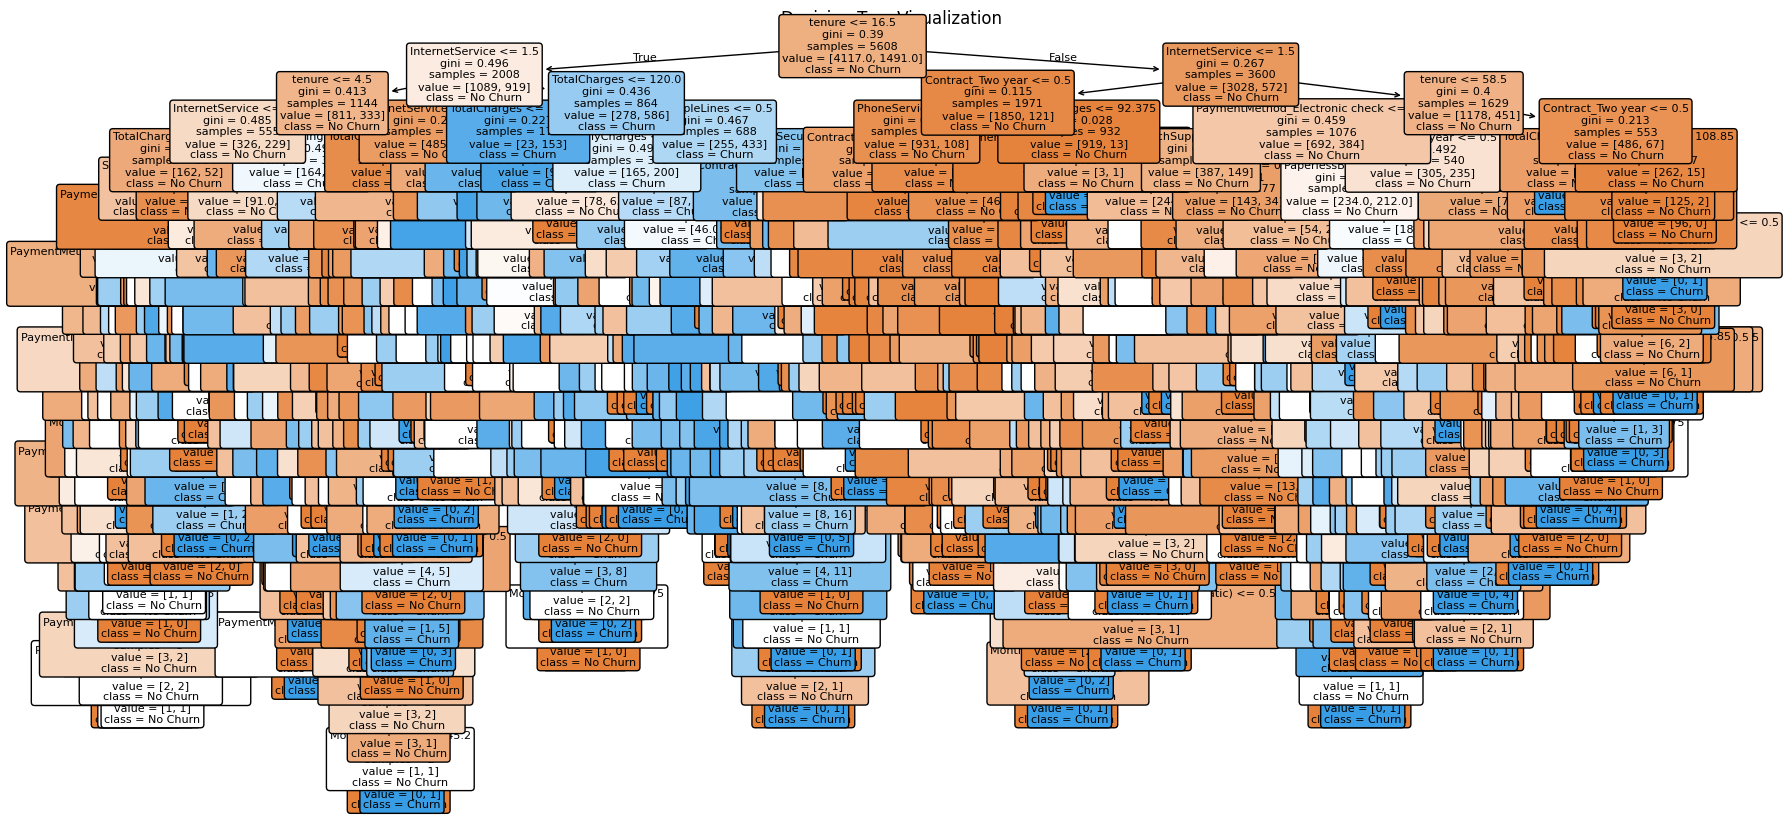

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=["No Churn", "Churn"],
    filled=True,
    rounded=True,
    fontsize=8
)

plt.title("Decision Tree Visualization")
plt.show()

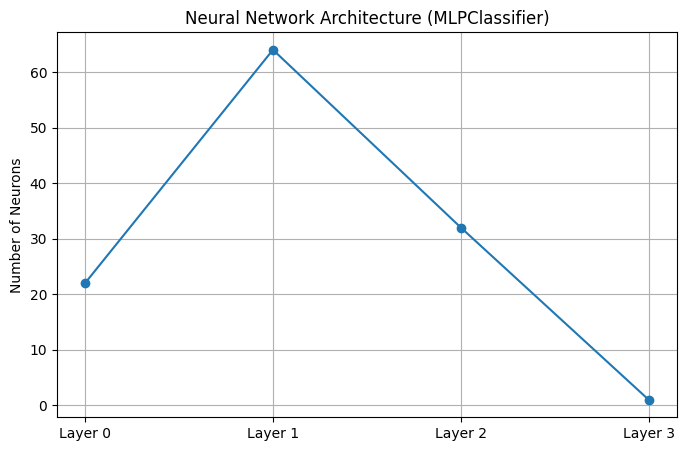

In [ ]:
import matplotlib.pyplot as plt

def plot_nn_structure(model, input_dim):
    layers = [input_dim] + list(model.hidden_layer_sizes) + [model.n_outputs_]

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.plot(layers, marker="o")
    ax.set_xticks(range(len(layers)))
    ax.set_xticklabels([f"Layer {i}" for i in range(len(layers))])
    ax.set_ylabel("Number of Neurons")
    ax.set_title("Neural Network Architecture (MLPClassifier)")
    ax.grid(True)
    plt.show()

# Plot NN structure
plot_nn_structure(nn_model, X_train.shape[1])